In [61]:
#Tensorflow 설치하기

# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

In [62]:
#라이브러리 불러오기

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


In [64]:
test.head()

,id,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,0,97,0,80.0,17.0,17.0,4,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,1,37,0,22.0,15.0,15.0,3,1,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,2,44,0,NaN,20.0,20.0,3,3,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,3,40,0,14.0,26.0,26.0,2,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,4,43,2,NaN,26.0,26.0,2,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0


In [65]:
submission.head()

,id,label
0,0,malicious
1,1,benign
2,2,benign
3,3,benign
4,4,benign


In [66]:
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

## train

In [67]:
train['label_binary'] = train['label'].apply(lambda x : 0 if x == 'benign' else 1)

In [68]:
train = train.drop_duplicates(subset = list(train.columns), keep='first')
train

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,label_binary
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,21.0,21.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17.0,1.0,1.0,1.0,45.0,0.0,benign,0
3658,14.0,0.0,0.0,14.0,14.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,benign,0
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious,1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign,0


In [69]:
train.dropna(inplace=True)

In [70]:
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [71]:
temp = train.corr()
mask = np.zeros_like(temp)
mask[np.triu_indices_from(mask)] = True
mask = np.where(mask == 1, 0, 1)
result = mask * temp
result = result[result != 0]

In [72]:
result.loc['label_binary'].sort_values(ascending = False)

url_hostname_len           0.384489
url_domain_len             0.380448
url_num_hyphens_dom        0.355480
url_query_len              0.189689
url_num_query_para         0.184497
url_entropy                0.162198
html_num_tags('form')      0.116354
html_num_tags('body')      0.110581
html_num_tags('head')      0.012990
url_len                   -0.006429
url_port                  -0.006642
html_num_tags('iframe')   -0.033966
url_num_dots              -0.047256
html_num_tags('div')      -0.061183
url_ip_present            -0.076236
html_num_tags('object')   -0.105710
html_num_tags('embed')    -0.111295
url_path_len              -0.113835
html_num_tags('a')        -0.113966
url_num_underscores       -0.133808
html_num_tags('script')   -0.202309
url_chinese_present             NaN
html_num_tags('applet')         NaN
label_binary                    NaN
Name: label_binary, dtype: float64

In [73]:
col_name = list(result.loc['label_binary'].sort_values(ascending = False)[6:19].index)

print(col_name)

["html_num_tags('form')", "html_num_tags('body')", "html_num_tags('head')", 'url_len', 'url_port', "html_num_tags('iframe')", 'url_num_dots', "html_num_tags('div')", 'url_ip_present', "html_num_tags('object')", "html_num_tags('embed')", 'url_path_len', "html_num_tags('a')"]


In [74]:
col_name.append("html_num_tags('applet')")
col_name.append("url_chinese_present")
print(col_name)

["html_num_tags('form')", "html_num_tags('body')", "html_num_tags('head')", 'url_len', 'url_port', "html_num_tags('iframe')", 'url_num_dots', "html_num_tags('div')", 'url_ip_present', "html_num_tags('object')", "html_num_tags('embed')", 'url_path_len', "html_num_tags('a')", "html_num_tags('applet')", 'url_chinese_present']


In [75]:
train.drop(col_name, axis=1, inplace=True)

In [76]:
temp = train.corr()
mask = np.zeros_like(temp)
mask[np.triu_indices_from(mask)] = True
mask = np.where(mask == 1, 0, 1)
result = mask * temp
result = result[result != 0]

result.loc['label_binary'].sort_values(ascending = False)

url_hostname_len           0.384489
url_domain_len             0.380448
url_num_hyphens_dom        0.355480
url_query_len              0.189689
url_num_query_para         0.184497
url_entropy                0.162198
url_num_underscores       -0.133808
html_num_tags('script')   -0.202309
label_binary                    NaN
Name: label_binary, dtype: float64

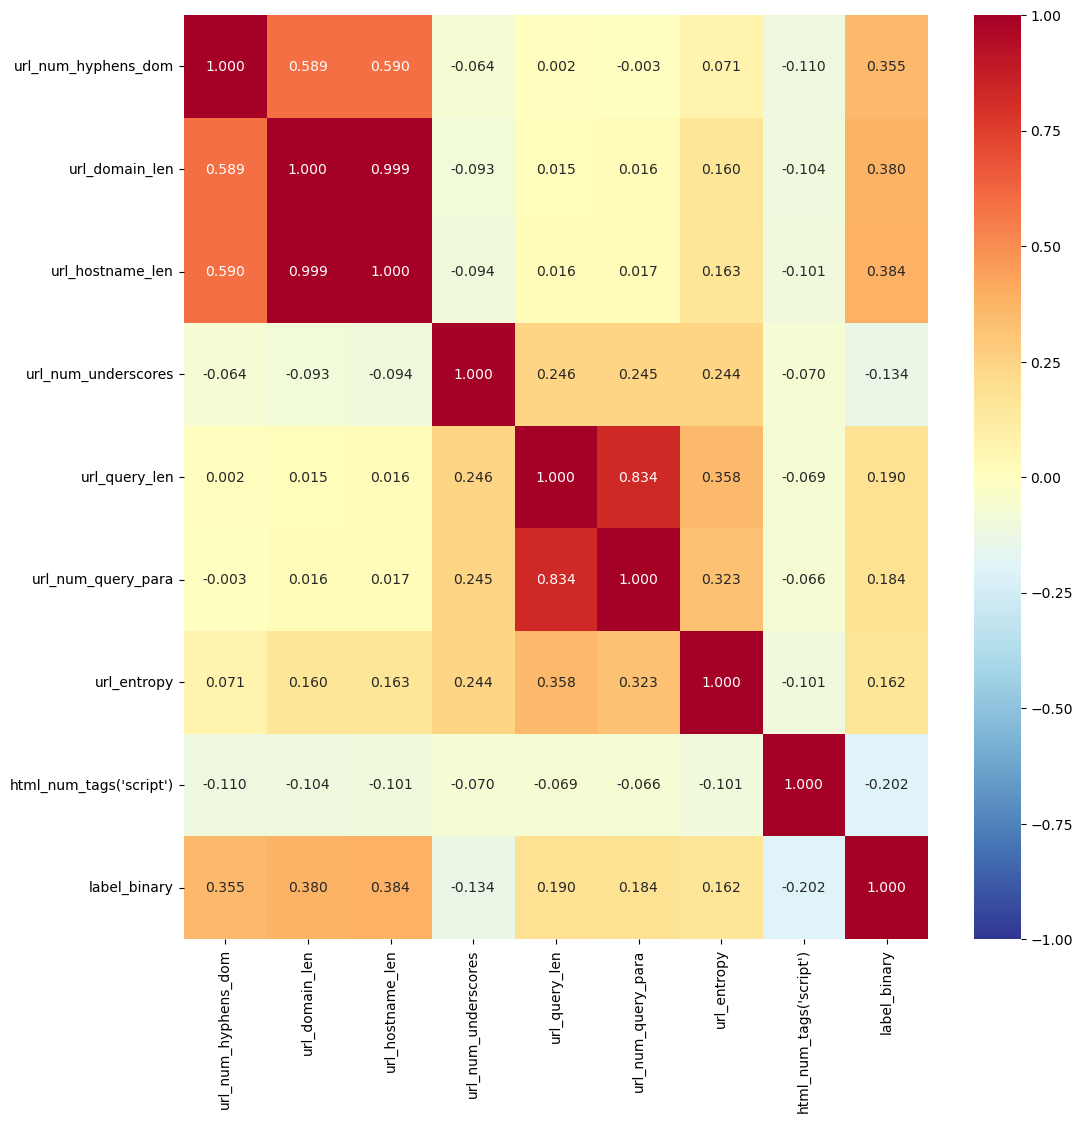

In [77]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

url_query_len = url_num_query_para          
url_domain_len = url_hostname_len              
url_len = url_path_len

In [78]:
train.url_num_hyphens_dom.unique()

array([ 0.,  2.,  1.,  3.,  4.,  6.,  5., 14.])

In [79]:
train.url_num_hyphens_dom.value_counts()

0.0     2402
1.0      448
2.0      283
3.0       66
4.0       23
5.0        5
6.0        3
14.0       1
Name: url_num_hyphens_dom, dtype: int64

In [54]:
train.url_num_underscores.unique()

AttributeError: 'DataFrame' object has no attribute 'url_num_underscores'

In [21]:
train.url_query_len.unique()

array([  0.,  21.,  41.,  36.,  45.,  71.,  11.,  27., 157.,  62., 124.,
        48., 132., 289.,  59.,  70.,  28.,  47., 165.,  44.,  35.,  20.,
        53.,  90., 140., 141.,  51.,   9.,  16., 114.,   5.,  55., 125.,
        13.,  31.,  34., 106., 162., 145.,  98.,  15., 110., 144., 200.,
        37.,  52., 271.,  49., 122., 312.,  42.,  85.,  18., 146., 350.,
        82., 102., 429.,   6.,  57.,  40.,  68.,  94., 173., 208.,  19.,
       185., 248.,  17.,  64.,  56.,  25.,  30.,  81., 156., 111., 120.,
        43.])

In [22]:
train.url_num_query_para.unique()

array([0., 1., 2., 3., 6., 7., 4., 9., 8.])

In [23]:
train.url_num_query_para.value_counts()

0.0    3053
1.0      98
2.0      35
3.0      31
6.0       5
7.0       4
9.0       2
8.0       2
4.0       1
Name: url_num_query_para, dtype: int64

In [24]:
train["html_num_tags('script')"].unique()

array([  7.,  18.,  33.,  15.,  10.,   4.,   8.,  22.,  17.,   3.,  36.,
        13.,   0.,   2.,  12.,   5.,  24.,  16.,   1.,   6.,  21.,  14.,
        28.,  11.,  42.,  35.,   9.,  43.,  25.,  27., 104.,  23., 108.,
        19.,  53.,  31.,  46.,  26.,  37.,  78.,  29.,  77.,  47.,  87.,
        83.,  38.,  50.,  49.,  20.,  44.,  32.,  45.,  48.,  61.,  39.,
        40.,  30.,  56.,  74.,  34.,  60.,  97., 267.,  41.,  52., 140.,
        65.,  51.,  90.,  98.,  70.,  54.,  69., 129.,  59.,  82., 174.,
        63.])

In [25]:
train["html_num_tags('embed')"].unique()

array([0., 1., 3.])

In [26]:
train["html_num_tags('embed')"].value_counts()

0.0    3173
1.0      56
3.0       2
Name: html_num_tags('embed'), dtype: int64

In [27]:
train["html_num_tags('object')"].unique()

array([0., 1., 2., 3., 8., 4., 5.])

In [28]:
train["html_num_tags('object')"].value_counts()

0.0    3153
1.0      69
2.0       5
3.0       1
8.0       1
4.0       1
5.0       1
Name: html_num_tags('object'), dtype: int64

In [29]:
train["html_num_tags('body')"].unique()

array([1., 2., 0., 3.])

In [30]:
train["html_num_tags('form')"].unique()

array([ 0.,  3.,  1.,  2.,  5.,  9.,  4.,  7., 57., 19.,  8., 11.,  6.,
       10.])

In [31]:
#train["html_num_tags('a')"].unique()

In [72]:
#train.url_path_len.unique()

In [73]:
train.url_hostname_len.unique()

array([ 15.,  17.,  16.,  14.,  27.,  18.,  19.,  25.,  13.,  23.,  20.,
        12.,  10.,  34.,  24.,  32.,  22.,  30.,  28.,  11.,  26.,  42.,
         9.,  21.,  33.,  43.,   8.,  31.,  44.,   6.,  48.,   7.,  37.,
         4.,  68.,  29.,  36.,  40.,  46., 101.,  39.,  38.,  35.,  61.,
        47.,  45.,  52.,  72.,  55.,  56.,  57., 104.,   5.,  41.,  51.,
        74.,  60.,  49., 109.,  85., 100.,  54.,  62.,  53.,  77.,  63.,
       103.])

## test

In [80]:
train.columns

Index(['url_num_hyphens_dom', 'url_domain_len', 'url_hostname_len',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_entropy', 'html_num_tags('script')', 'label', 'label_binary'],
      dtype='object')

In [82]:
Features_ = ['url_num_hyphens_dom', 'url_domain_len', 'url_hostname_len',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_entropy',"html_num_tags('script')"]

In [83]:
test = test[Features_]

In [84]:
test.isnull().sum()

url_num_hyphens_dom          0
url_domain_len             466
url_hostname_len           463
url_num_underscores          0
url_query_len                0
url_num_query_para           0
url_entropy                  0
html_num_tags('script')    467
dtype: int64

In [59]:
test.url_domain_len

0       17.0
1       15.0
2       20.0
3       26.0
4       26.0
        ... 
2436    17.0
2437    35.0
2438    22.0
2439    14.0
2440    22.0
Name: url_domain_len, Length: 2441, dtype: float64

In [85]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [38]:
test.head()

,id,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_underscores,url_query_len,url_num_query_para,url_entropy,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
0,0,0,80.0,17.0,17.0,0,0,0,4.844913,5.0,0,0,1,1.0,3.0
1,1,0,22.0,15.0,15.0,1,0,0,4.246157,NaN,0,0,1,NaN,NaN
2,2,0,NaN,20.0,20.0,3,0,0,4.612835,6.0,3,3,1,0.0,136.0
3,3,0,14.0,26.0,26.0,0,0,0,4.238521,NaN,0,0,1,1.0,2.0
4,4,2,NaN,26.0,26.0,0,0,0,4.240669,NaN,0,0,1,NaN,NaN


## 결측치 처리

결측치 처리 리스트 

url_path_len,         
url_hostname_len,             
html_num_tags('script'),            
html_num_tags('form'),                
html_num_tags('a')

In [86]:
train

,url_num_hyphens_dom,url_domain_len,url_hostname_len,url_num_underscores,url_query_len,url_num_query_para,url_entropy,html_num_tags('script'),label,label_binary
0,0.0,15.0,15.0,0.0,0.0,0.0,4.260333,7.0,malicious,1
1,0.0,17.0,17.0,0.0,0.0,0.0,4.636107,18.0,benign,0
2,0.0,16.0,16.0,0.0,0.0,0.0,3.708966,33.0,benign,0
3,0.0,14.0,14.0,0.0,0.0,0.0,4.025592,15.0,benign,0
4,2.0,27.0,27.0,0.0,0.0,0.0,4.631833,10.0,benign,0
...,...,...,...,...,...,...,...,...,...,...
3657,0.0,21.0,21.0,0.0,0.0,0.0,4.148415,63.0,benign,0
3658,0.0,14.0,14.0,0.0,0.0,0.0,3.499228,0.0,benign,0
3659,3.0,52.0,52.0,0.0,0.0,0.0,4.135356,0.0,malicious,1
3660,0.0,18.0,18.0,0.0,0.0,0.0,4.362331,14.0,benign,0


In [87]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed= imputer.fit_transform(train[Features_])

In [88]:
temp_train = pd.DataFrame(imputed, columns=train.columns[:-2])

In [89]:
test_copy = test.copy()
#train_drop = train.drop('ProdTaken', axis=1)
imputer.fit(temp_train)   # 여기서도 data leakage에 조심하자
test = imputer.transform(test)

test = pd.DataFrame(test, columns=test_copy.columns)

In [90]:
test.head()

,url_num_hyphens_dom,url_domain_len,url_hostname_len,url_num_underscores,url_query_len,url_num_query_para,url_entropy,html_num_tags('script')
0,0.0,17.0,17.0,0.0,0.0,0.0,4.844913,5.000000
1,0.0,15.0,15.0,1.0,0.0,0.0,4.246157,20.333333
2,0.0,20.0,20.0,3.0,0.0,0.0,4.612835,6.000000
3,0.0,26.0,26.0,0.0,0.0,0.0,4.238521,3.000000
4,2.0,26.0,26.0,0.0,0.0,0.0,4.240669,2.000000


In [91]:
test.isnull().sum()

url_num_hyphens_dom        0
url_domain_len             0
url_hostname_len           0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_entropy                0
html_num_tags('script')    0
dtype: int64

## 모델링

In [94]:
!pip install catboost

     --------------------------------------- 74.0/74.0 MB 23.4 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [92]:
from catboost import CatBoostClassifier

In [93]:
train.head()

,url_num_hyphens_dom,url_domain_len,url_hostname_len,url_num_underscores,url_query_len,url_num_query_para,url_entropy,html_num_tags('script'),label,label_binary
0,0.0,15.0,15.0,0.0,0.0,0.0,4.260333,7.0,malicious,1
1,0.0,17.0,17.0,0.0,0.0,0.0,4.636107,18.0,benign,0
2,0.0,16.0,16.0,0.0,0.0,0.0,3.708966,33.0,benign,0
3,0.0,14.0,14.0,0.0,0.0,0.0,4.025592,15.0,benign,0
4,2.0,27.0,27.0,0.0,0.0,0.0,4.631833,10.0,benign,0


In [94]:
X = train.drop(['label','label_binary'], axis=1)
y = train['label_binary']

In [100]:
from sklearn.model_selection import cross_val_score
cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000, 
                     subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0)

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(cb , X, y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.9382 0.952  0.9396 0.9551 0.9582]
평균 검증 정확도: 0.9486


In [96]:
cb.fit(X, y)

In [97]:
pred = cb.predict(test)

In [98]:
len(pred)

2441

In [99]:
submission['label'] = pred

In [100]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [101]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [102]:
submission.to_csv('world_submission_2_2.csv', index = False)

## 모델링2

In [ ]:
from sklearn.model_selection import GridSearchCV

In [118]:
params = {'iterations': [200,400,600,800],
          'depth': [4, 5, 6],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'learning_rate' : [0.01,0.02,0.03,0.04],
          'leaf_estimation_iterations': [10],
           'eval_metric': ['Accuracy'],
          'logging_level':['Silent'],
          'random_seed': [42]
         }

In [119]:
from sklearn.metrics import log_loss, make_scorer
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

In [125]:
pds

PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1]))

In [127]:
clf = CatBoostClassifier()

In [131]:
clf_grid = GridSearchCV(estimator=clf, param_grid=params, scoring=LogLoss, cv=5, verbose = 10)

In [132]:
clf_grid

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E0025DA070>,
             param_grid={'depth': [4, 5, 6], 'eval_metric': ['Accuracy'],
                         'iterations': [200, 400, 600, 800],
                         'l2_leaf_reg': array([1.00000000e-20, 3.16227766e-20, 1.00000000e-19]),
                         'leaf_estimation_iterations': [10],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'logging_level': ['Silent'], 'random_seed': [42]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=10)

In [133]:
clf_grid.fit(X = X, y = y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 1/5; 1/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.259 total time=   0.6s
[CV 2/5; 1/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 2/5; 1/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.250 total time=   0.7s
[CV 3/5; 1/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_s

[CV 2/5; 5/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.250 total time=   0.6s
[CV 3/5; 5/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 3/5; 5/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.269 total time=   0.5s
[CV 4/5; 5/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 4/5; 5/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=S

[CV 2/5; 9/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.250 total time=   0.6s
[CV 3/5; 9/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 3/5; 9/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.269 total time=   0.6s
[CV 4/5; 9/144] START depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 4/5; 9/144] END depth=4, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.235 total time=   0.6s
[CV 5/5; 9/144] START de

[CV 4/5; 13/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.190 total time=   1.8s
[CV 5/5; 13/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 5/5; 13/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.194 total time=   1.6s
[CV 1/5; 14/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 1/5; 14/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.189 total time=   1.7s
[CV 2/5; 14/144] ST

[CV 5/5; 17/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.194 total time=   1.4s
[CV 1/5; 18/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 1/5; 18/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.189 total time=   1.4s
[CV 2/5; 18/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 2/5; 18/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_le

[CV 5/5; 21/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.194 total time=   1.4s
[CV 1/5; 22/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 1/5; 22/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.189 total time=   1.3s
[CV 2/5; 22/144] START depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 2/5; 22/144] END depth=4, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.177 total time=   1.3s
[CV 3/5; 22/144] ST

[CV 2/5; 26/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.158 total time=   2.5s
[CV 3/5; 26/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 3/5; 26/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.176 total time=   2.4s
[CV 4/5; 26/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 4/5; 26/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.141 total time=   2.4s
[CV 5/5; 26/144] ST

[CV 3/5; 30/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.176 total time=   2.2s
[CV 4/5; 30/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 4/5; 30/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.141 total time=   2.4s
[CV 5/5; 30/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 5/5; 30/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_le

[CV 4/5; 34/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.141 total time=   1.9s
[CV 5/5; 34/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 5/5; 34/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.136 total time=   2.4s
[CV 1/5; 35/144] START depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 1/5; 35/144] END depth=4, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.157 total time=   2.1s
[CV 2/5; 35/144] ST

[CV 1/5; 39/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.155 total time=   4.0s
[CV 2/5; 39/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 2/5; 39/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.144 total time=   3.9s
[CV 3/5; 39/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 3/5; 39/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.177 total time=   3.3s
[CV 4/5; 39/144] ST

[CV 2/5; 43/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.144 total time=   2.4s
[CV 3/5; 43/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 3/5; 43/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.177 total time=   2.3s
[CV 4/5; 43/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 4/5; 43/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_le

[CV 3/5; 47/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.177 total time=   3.0s
[CV 4/5; 47/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 4/5; 47/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.126 total time=   2.9s
[CV 5/5; 47/144] START depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 5/5; 47/144] END depth=4, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.118 total time=   3.0s
[CV 1/5; 48/144] ST

[CV 5/5; 51/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.156 total time=   0.9s
[CV 1/5; 52/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 1/5; 52/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.179 total time=   1.4s
[CV 2/5; 52/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 2/5; 52/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.164 total time=   1.1s
[CV 3/5; 52/144] ST

[CV 1/5; 56/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.179 total time=   0.9s
[CV 2/5; 56/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 2/5; 56/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.164 total time=   1.2s
[CV 3/5; 56/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 3/5; 56/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_le

[CV 2/5; 60/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.164 total time=   0.7s
[CV 3/5; 60/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 3/5; 60/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.177 total time=   0.8s
[CV 4/5; 60/144] START depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 4/5; 60/144] END depth=5, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.148 total time=   0.7s
[CV 5/5; 60/144] ST

[CV 4/5; 64/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.119 total time=   1.1s
[CV 5/5; 64/144] START depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 5/5; 64/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.124 total time=   1.1s
[CV 1/5; 65/144] START depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 1/5; 65/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.198 total 

[CV 4/5; 68/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.119 total time=   1.4s
[CV 5/5; 68/144] START depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 5/5; 68/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.124 total time=   1.3s
[CV 1/5; 69/144] START depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 1/5; 69/144] END depth=5, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, sco

[CV 1/5; 73/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.184 total time=   2.4s
[CV 2/5; 73/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 2/5; 73/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.172 total time=   2.7s
[CV 3/5; 73/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 3/5; 73/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.189 total time=   2.6s
[CV 4/5; 73/144] ST

[CV 3/5; 77/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.189 total time=   3.8s
[CV 4/5; 77/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 4/5; 77/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.156 total time=   3.6s
[CV 5/5; 77/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 5/5; 77/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_le

[CV 3/5; 81/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.189 total time=   2.0s
[CV 4/5; 81/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 4/5; 81/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.156 total time=   2.0s
[CV 5/5; 81/144] START depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 5/5; 81/144] END depth=5, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.155 total time=   1.9s
[CV 1/5; 82/144] ST

[CV 5/5; 85/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.142 total time=   3.3s
[CV 1/5; 86/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 1/5; 86/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.166 total time=   3.2s
[CV 2/5; 86/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 2/5; 86/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.133 total time=   3.3s
[CV 3/5; 86/144] ST

[CV 1/5; 90/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.166 total time=   4.2s
[CV 2/5; 90/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 2/5; 90/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.133 total time=   3.8s
[CV 3/5; 90/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 3/5; 90/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_le

[CV 2/5; 94/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.133 total time=   3.0s
[CV 3/5; 94/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 3/5; 94/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.168 total time=   2.9s
[CV 4/5; 94/144] START depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 4/5; 94/144] END depth=5, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.120 total time=   3.0s
[CV 5/5; 94/144] ST

[CV 4/5; 98/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.155 total time=   1.4s
[CV 5/5; 98/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42
[CV 5/5; 98/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.158 total time=   1.9s
[CV 1/5; 99/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 1/5; 99/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.180 total time=   2.0s
[CV 2/5; 99/144] ST

[CV 5/5; 102/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.02, logging_level=Silent, random_seed=42;, score=-0.158 total time=   1.3s
[CV 1/5; 103/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 1/5; 103/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.180 total time=   1.0s
[CV 2/5; 103/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 2/5; 103/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, loggi

[CV 1/5; 107/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.180 total time=   1.0s
[CV 2/5; 107/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 2/5; 107/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.158 total time=   0.9s
[CV 3/5; 107/144] START depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 3/5; 107/144] END depth=6, eval_metric=Accuracy, iterations=200, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.191 total time=   0.9s
[CV 4/5; 107/1

[CV 3/5; 111/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.189 total time=   1.6s
[CV 4/5; 111/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 4/5; 111/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.117 total time=   1.6s
[CV 5/5; 111/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 5/5; 111/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.120 total time=   1.6s
[CV 1/5; 112/1

[CV 4/5; 115/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.117 total time=   2.3s
[CV 5/5; 115/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42
[CV 5/5; 115/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.120 total time=   2.6s
[CV 1/5; 116/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 1/5; 116/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, loggi

[CV 5/5; 119/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.03, logging_level=Silent, random_seed=42;, score=-0.120 total time=   1.8s
[CV 1/5; 120/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 1/5; 120/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.192 total time=   1.8s
[CV 2/5; 120/144] START depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 2/5; 120/144] END depth=6, eval_metric=Accuracy, iterations=400, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.136 total time=   1.7s
[CV 3/5; 120/1

[CV 2/5; 124/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.141 total time=   2.4s
[CV 3/5; 124/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 3/5; 124/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.229 total time=   2.4s
[CV 4/5; 124/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 4/5; 124/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.137 total time=   2.5s
[CV 5/5; 124/1

[CV 2/5; 128/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.141 total time=   3.2s
[CV 3/5; 128/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 3/5; 128/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.229 total time=   3.2s
[CV 4/5; 128/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 4/5; 128/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, loggi

[CV 3/5; 132/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.229 total time=   2.4s
[CV 4/5; 132/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 4/5; 132/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.137 total time=   2.4s
[CV 5/5; 132/144] START depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42
[CV 5/5; 132/144] END depth=6, eval_metric=Accuracy, iterations=600, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.134 total time=   2.5s
[CV 1/5; 133/1

[CV 5/5; 136/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.145 total time=   3.5s
[CV 1/5; 137/144] START depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 1/5; 137/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.170 total time=   3.4s
[CV 2/5; 137/144] START depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 2/5; 137/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent,

[CV 5/5; 140/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=3.162277660168379e-20, leaf_estimation_iterations=10, learning_rate=0.04, logging_level=Silent, random_seed=42;, score=-0.145 total time=   4.3s
[CV 1/5; 141/144] START depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 1/5; 141/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.170 total time=   4.8s
[CV 2/5; 141/144] START depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42
[CV 2/5; 141/144] END depth=6, eval_metric=Accuracy, iterations=800, l2_leaf_reg=1e-19, leaf_estimation_iterations=10, learning_rate=0.01, logging_level=Silent, random_seed=42;, score=-0.147 total time=   4.7

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E0025DA070>,
             param_grid={'depth': [4, 5, 6], 'eval_metric': ['Accuracy'],
                         'iterations': [200, 400, 600, 800],
                         'l2_leaf_reg': array([1.00000000e-20, 3.16227766e-20, 1.00000000e-19]),
                         'leaf_estimation_iterations': [10],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'logging_level': ['Silent'], 'random_seed': [42]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=10)

In [136]:
clf_grid.best_params_

{'depth': 5,
 'eval_metric': 'Accuracy',
 'iterations': 800,
 'l2_leaf_reg': 1e-19,
 'leaf_estimation_iterations': 10,
 'learning_rate': 0.02,
 'logging_level': 'Silent',
 'random_seed': 42}

In [143]:
cb = CatBoostClassifier(learning_rate= 0.02, depth= 5, eval_metric='Accuracy', iterations=800, l2_leaf_reg=1e-19, 
                        leaf_estimation_iterations=10, random_seed=42, verbose =0)

In [144]:
cb.fit(X, y)

In [145]:
pred = cb.predict(test)

In [146]:
len(pred)

2441

In [147]:
submission['label'] = pred

In [148]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [149]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [150]:
submission.to_csv('world_submission_2.csv', index = False)

## 모델링3

In [152]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 22.0 MB/s eta 0:00:00


In [153]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

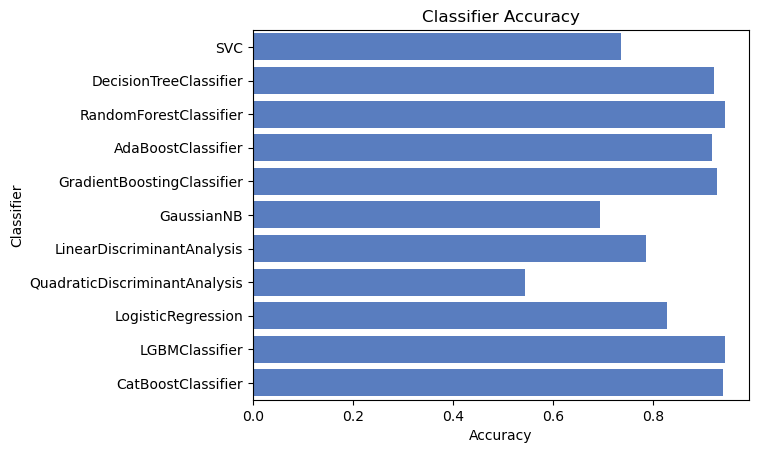

In [154]:
classifiers = [
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    LGBMClassifier(random_state=0),
    CatBoostClassifier(random_state=0, verbose=False)]

log_cols = ["Classifier", "Accuracy"]
log  = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [171]:
log.sort_values('Accuracy',ascending=False).sort_values('Accuracy',ascending=False).reset_index(drop=True)

,Classifier,Accuracy
0,RandomForestClassifier,0.945062
1,LGBMClassifier,0.943827
2,CatBoostClassifier,0.941358
3,GradientBoostingClassifier,0.928395
4,DecisionTreeClassifier,0.922222
5,AdaBoostClassifier,0.918210
6,LogisticRegression,0.827469
7,LinearDiscriminantAnalysis,0.786111
8,SVC,0.736420
9,GaussianNB,0.693827


In [172]:
# Classifiers
classifiers = {
    "Dtree" : DecisionTreeClassifier(random_state = 42),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42),
    "CatBoost" : CatBoostClassifier(random_state=42, verbose=False),
    "GradientBoost" : GradientBoostingClassifier()
}

# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

tree_grid = {'criterion': ['gini', 'entropy'],
            'max_depth': [2, 4, 6, 8, 10, None]}



# Dictionary of all grids
grid = {
    "Dtree" : tree_grid,
    "RandomForest" : RF_grid,
    "LGBM" : boosted_grid,
    "CatBoost" : boosted_grid,
    "GradientBoost": boosted_grid
}

In [173]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

In [175]:
import time

i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_test, y_test)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

Model: Dtree
Training time (mins): 0.08

Model: RandomForest
Training time (mins): 0.16

Model: LGBM
Training time (mins): 0.08

Model: CatBoost
Training time (mins): 3.99

Model: GradientBoost
Training time (mins): 0.66



In [176]:
valid_scores.sort_values('Validation accuracy',ascending=False)

,Classifer,Validation accuracy,Training time
3,CatBoost,0.947450,3.99
2,LGBM,0.942813,0.08
4,GradientBoost,0.936631,0.66
1,RandomForest,0.928903,0.16
0,Dtree,0.904173,0.08


In [177]:
clf_best_params

{'Dtree': {'criterion': 'gini', 'max_depth': 8},
 'RandomForest': {'max_depth': 12, 'n_estimators': 300},
 'LGBM': {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150},
 'CatBoost': {'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 200},
 'GradientBoost': {'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 100}}

In [178]:
# 상위 4개의 ML 모델 생성
RF_clf = RandomForestClassifier(**clf_best_params["RandomForest"],random_state=0)
lgbm_clf = LGBMClassifier(**clf_best_params["LGBM"],random_state=0)
cb_clf = CatBoostClassifier(**clf_best_params["CatBoost"],random_state=0, verbose=False)
gb_clf= GradientBoostingClassifier(**clf_best_params["GradientBoost"],random_state=0)

In [179]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False)
    
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__,'model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')
        X_tr = X_train_n.iloc[train_index]
        y_tr = y_train_n.iloc[train_index]
        X_te = X_train_n.iloc[valid_index]
        
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index,:] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    return train_fold_pred, test_pred_mean

In [181]:
RF_train, RF_test = get_stacking_base_datasets(RF_clf, X, y, test, 7)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_clf, X, y, test, 7)
cb_train, cb_test = get_stacking_base_datasets(cb_clf, X, y, test, 7)
gb_train, gb_test = get_stacking_base_datasets(gb_clf, X, y, test, 7)

RandomForestClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
LGBMClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
CatBoostClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
GradientBoostingClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [182]:
Stack_final_X_train = np.concatenate((RF_train, lgbm_train, cb_train, gb_train), axis=1)
Stack_final_X_test = np.concatenate((RF_test, lgbm_test, cb_test, gb_test), axis=1)
cb_clf.fit(Stack_final_X_train,y)
stack_final = cb_clf.predict(Stack_final_X_test)

In [183]:
submission['label'] = stack_final

In [184]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [185]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [187]:
submission.to_csv('world_submission_5.csv', index = False)

## 모델링 4

In [155]:
lgbm = LGBMClassifier()

In [156]:
lgbm.fit(X, y)

LGBMClassifier()

In [157]:
pred = lgbm.predict(test)

In [158]:
len(pred)

2441

In [159]:
submission['label'] = pred

In [160]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [161]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [162]:
submission.to_csv('world_submission_3.csv', index = False)

## 모델링 5

In [163]:
rf = RandomForestClassifier()

In [164]:
rf.fit(X, y)

RandomForestClassifier()

In [165]:
pred = rf.predict(test)

In [166]:
len(pred)

2441

In [167]:
submission['label'] = pred

In [168]:
submission['label'] = submission['label'].apply(lambda x : 'malicious' if x == 1 else 'benign')

In [169]:
submission

,id,label
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,malicious
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [170]:
submission.to_csv('world_submission_4.csv', index = False)

## 모델링 6